```markdown
Análise de dados Premier League 2023-24 
```


In [2]:
%pip install pandas




  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.3/11.5 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.5 MB 8.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.5 MB 13.4 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.read_csv('PL23.csv')

df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


In [2]:
df.isnull().any()

Div         False
Date        False
Time        False
HomeTeam    False
AwayTeam    False
            ...  
PCAHA       False
MaxCAHH      True
MaxCAHA      True
AvgCAHH     False
AvgCAHA     False
Length: 106, dtype: bool

In [17]:
# df.dropna(axis=1, inplace=True)
# df.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.45,1.64,2.28,1.50,1.95,1.98,1.95,1.97,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.79,1.49,2.63,-2.00,1.95,1.98,1.93,1.97,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.23,1.74,2.12,0.00,2.02,1.91,2.01,1.92,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.66,1.55,2.48,-1.75,2.01,1.92,2.00,1.91,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.81,2.17,1.71,-0.25,2.06,1.87,2.04,1.88,1.98,1.88


In [3]:
total_FTHG = df['FTHG'].sum()
total_FTAG = df['FTAG'].sum()

total_HTHG = df['HTHG'].sum()
total_HTAG = df['HTAG'].sum()

total_FTG = total_FTHG + total_FTAG
total_HTG = total_HTHG + total_HTAG

print("Total Full Time Goals: ", total_FTG)
print("Total Half Time Goals: ", total_HTG)



Total Full Time Goals:  1246
Total Half Time Goals:  517


In [5]:
percentage_h = (df['FTR'].value_counts()['H'] / len(df['FTR'])) * 100
print(f"A porcentagem de valores 'H' na coluna 'FTR' é de {percentage_h:.2f}%")

percentage_d = (df['FTR'].value_counts()['D'] / len(df['FTR'])) * 100
print(f"A porcentagem de valores 'D' na coluna 'FTR' é de {percentage_d:.2f}%")

percentage_a = (df['FTR'].value_counts()['A'] / len(df['FTR'])) * 100
print(f"A porcentagem de valores 'A' na coluna 'FTR' é de {percentage_a:.2f}%")



A porcentagem de valores 'H' na coluna 'FTR' é de 46.05%
A porcentagem de valores 'D' na coluna 'FTR' é de 21.58%
A porcentagem de valores 'A' na coluna 'FTR' é de 32.37%


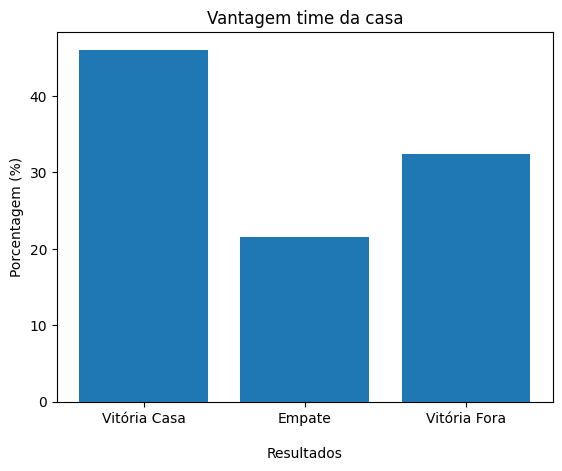

In [26]:
plt.bar(['Vitória Casa', 'Empate', 'Vitória Fora'], [percentage_h, percentage_d, percentage_a])
plt.xlabel('\nResultados')
plt.ylabel('Porcentagem (%)')
plt.title('Vantagem time da casa')
plt.show()

In [27]:
df['ExpectedResult'] = df[['B365H', 'B365D', 'B365A']].idxmin(axis=1)

mapping = {'B365H': 'H', 'B365D': 'D', 'B365A': 'A'}
df['ExpectedResult'] = df['ExpectedResult'].map(mapping)

matches = (df['ExpectedResult'] == df['FTR']).sum()

print(f"O time favorito venceu {matches} partidas de {len(df)} possíveis")

O time favorito venceu 227 partidas de 380 possíveis


In [28]:
def calculate_amount(row):
    odds_mapping = {'H': 'B365H', 'A': 'B365A', 'D': 'B365D'}

    if row['ExpectedResult'] == row['FTR']:
        return row[odds_mapping[row['ExpectedResult']]]
    else:
        return 0



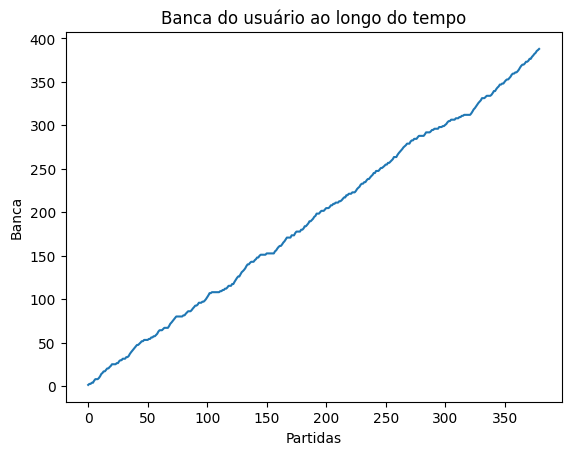

O usuário realizou 380 apostas.
O usuário ganhou 7.779999999999973 reais.


In [29]:
df['amount'] = df.apply(calculate_amount, axis=1)

# Calculate the cumulative sum of the amounts to get the user's balance after each match
df['cumulative_amount'] = df['amount'].cumsum()

# Plot the user's balance over time
plt.plot(df['cumulative_amount'])
plt.xlabel('Partidas')
plt.ylabel('Banca')
plt.title('Banca do usuário ao longo do tempo')
plt.show()

print(f"O usuário realizou {len(df['cumulative_amount'])} apostas.")
print(f"O usuário ganhou {df['amount'].sum()-len(df['cumulative_amount'])} reais.")